### Qiskit 1.3.1

qiskit-ibm-runtime 0.23 (Estimator V2)

pip install -U qiskit-ibm-runtime (updating library for quantum hardware)

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution

In [3]:
qc = QuantumCircuit(2,1)

qc.x(0)
qc.barrier()
qc.h(0)
qc.h(1)
#identity function f(x)=x
qc.cx(1,0)
qc.barrier()
qc.h(1) 
qc.measure(1,0)

qc.draw()

┌───┐ ░ ┌───┐┌───┐ ░         
q_0: ┤ X ├─░─┤ H ├┤ X ├─░─────────
     └───┘ ░ ├───┤└─┬─┘ ░ ┌───┐┌─┐
q_1: ──────░─┤ H ├──■───░─┤ H ├┤M├
           ░ └───┘      ░ └───┘└╥┘
c: 1/═══════════════════════════╩═
                                0

The following code loads the account and specifies the least busy computer.

Real hardware devices need to be recalibrated regularly, and the fidelity of a specific qubit or gate can change over time. Furthermore, different chips have different qubit connectivity. If we try to run a circuit that performs a two-qubit gate between two qubits that are not connected on the specified device, the transpiler will add SWAP gates. Therefore it is good practice to check with the IBM Quantum Experience webpage before running

In [4]:
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session, Batch

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)

print("least busy backend: ", backend)


least busy backend:  <IBMBackend('ibm_brisbane')>


In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=1)

circuit_ibm = pm.run(qc)
circuit_ibm.draw(idle_wires=False,fold=200)

global phase: π/2
         ┌───┐ ░    ┌────┐  ┌─────────┐┌──────┐      ░                                
q_0 -> 0 ┤ X ├─░────┤ √X ├──┤ Rz(π/2) ├┤1     ├──────░────────────────────────────────
         └───┘ ░ ┌──┴────┴─┐└──┬────┬─┘│  Ecr │┌───┐ ░ ┌─────────┐┌────┐┌─────────┐┌─┐
q_1 -> 1 ──────░─┤ Rz(π/2) ├───┤ √X ├──┤0     ├┤ X ├─░─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤M├
               ░ └─────────┘   └────┘  └──────┘└───┘ ░ └─────────┘└────┘└─────────┘└╥┘
    c: 1/═══════════════════════════════════════════════════════════════════════════╩═
                                                                                    0

In [6]:
# To run on local simulator:
#   1. Use the Sampler from qiskit.primitives instead
#   2. Remove the Batch context manager below

with Batch(backend=backend) as batch:
    sampler = Sampler()
    dist = sampler.run([circuit_ibm]).result()

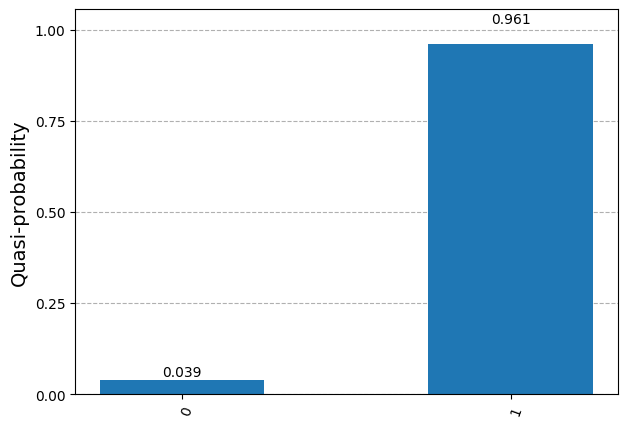

In [8]:
result = dist[0].data.c.get_counts()
plot_distribution(result)